In [1]:
import pandas as pd
path='/kaggle/input/wholesale-customers/Wholesale customers data.csv'
data=pd.read_csv(path)

In [2]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: >

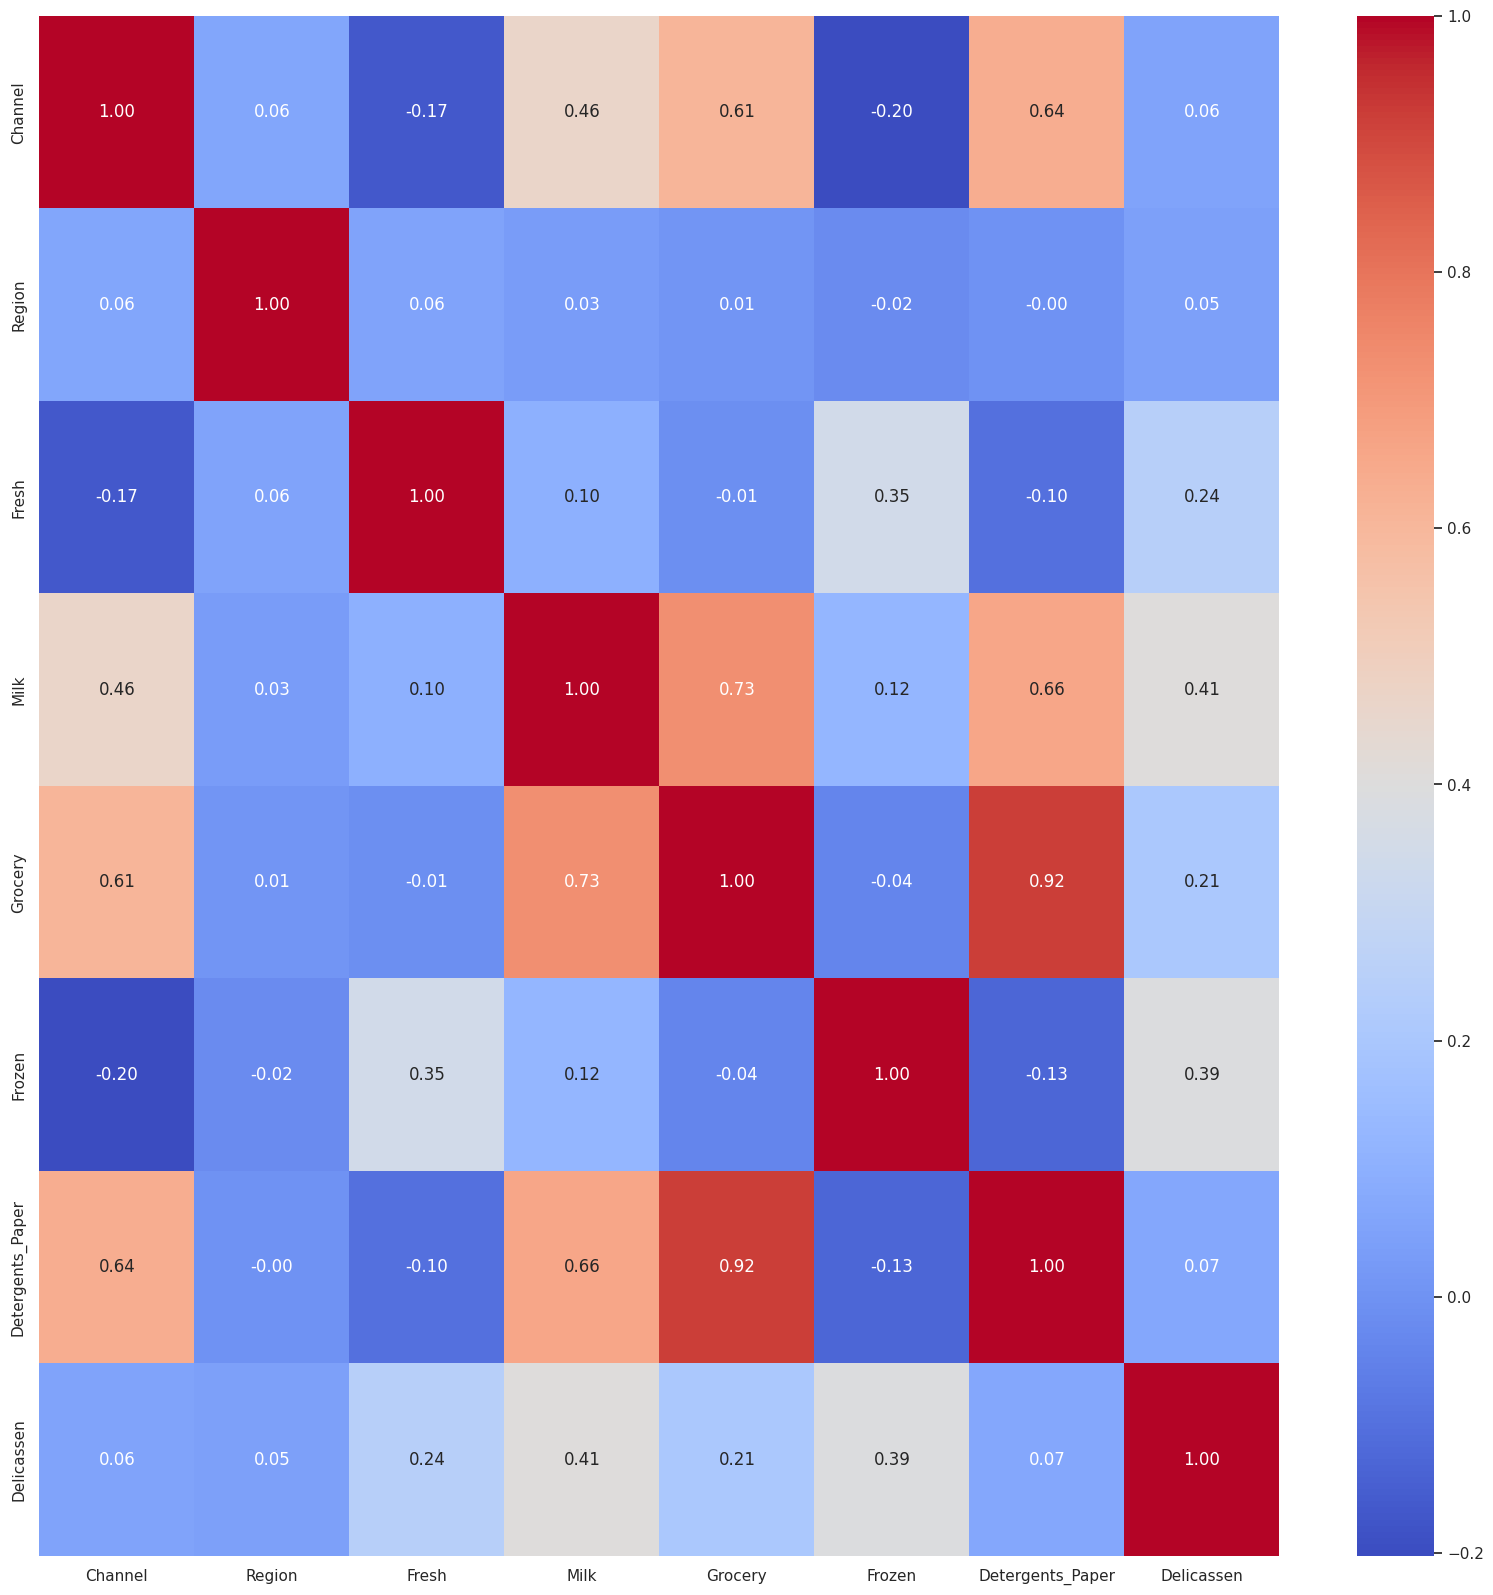

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

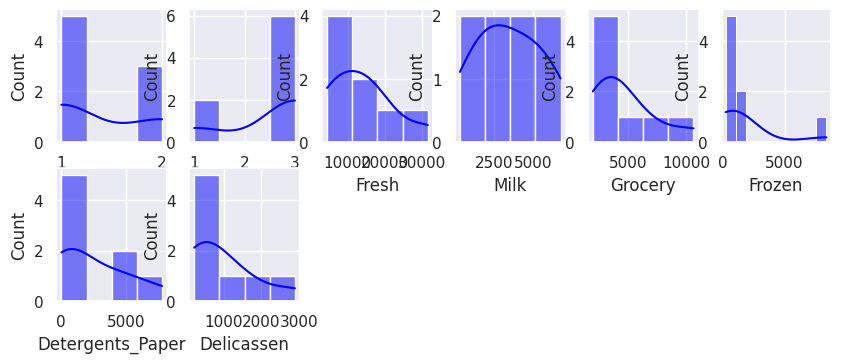

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
for i, column in enumerate(list(data.columns), 1):
    plt.subplot(5,6,i)
    p=sns.histplot(x=column,data=data.sample(8),stat='count',kde=True,color='blue')

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


Kmeans clustering

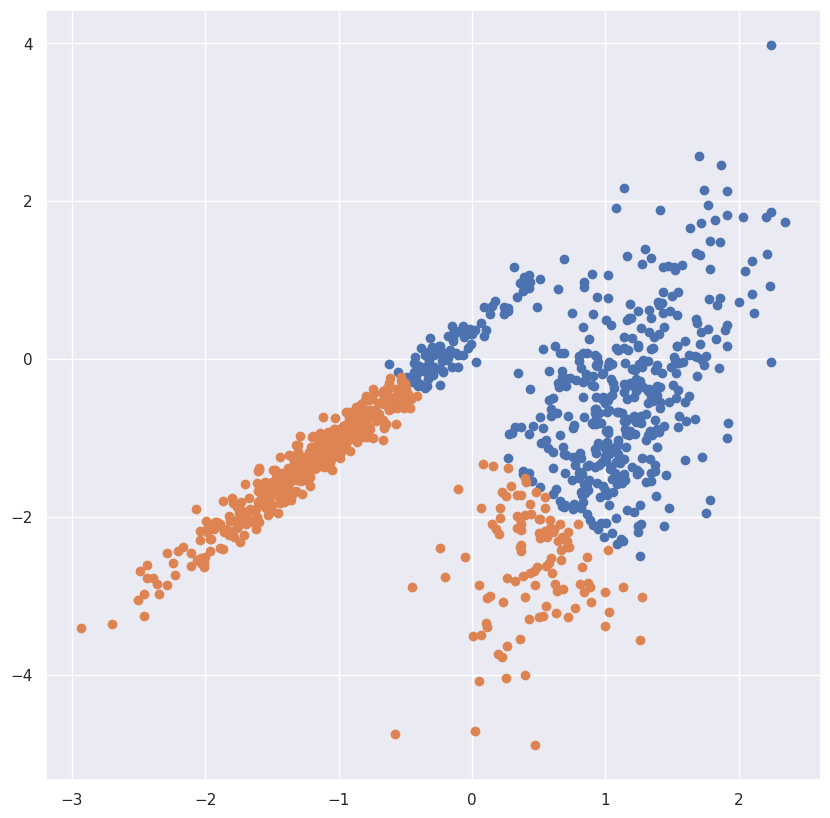

In [7]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
kmeans_model = KMeans(n_clusters=2 ,random_state=42, n_init=10)

# assign each data point to a cluster
kmeans_result = kmeans_model.fit_predict(training_data)

# get all of the unique clusters
kmeans_clusters = unique(kmeans_result)

# plot the Kmeans clusters
for kmeans_clusters in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_clusters)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Kmeans plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

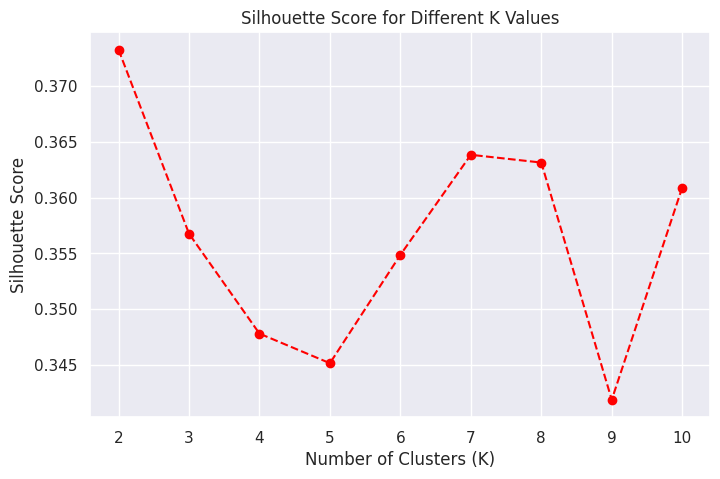

In [8]:
#Plot Silhouette
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()

DBSCAN

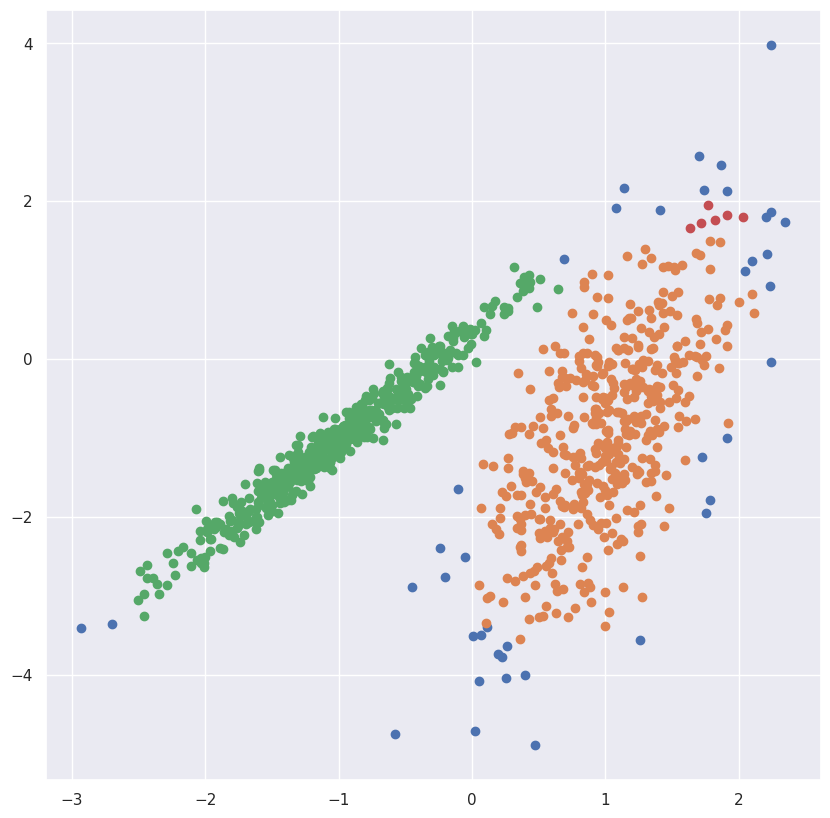

In [9]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
dbscan_model = DBSCAN(eps=0.3, min_samples=8)

# train the model
dbscan_model.fit(training_data)

# assign each data point to a cluster
dbscan_result = dbscan_model.labels_

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_clusters in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)

    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

Gaussian

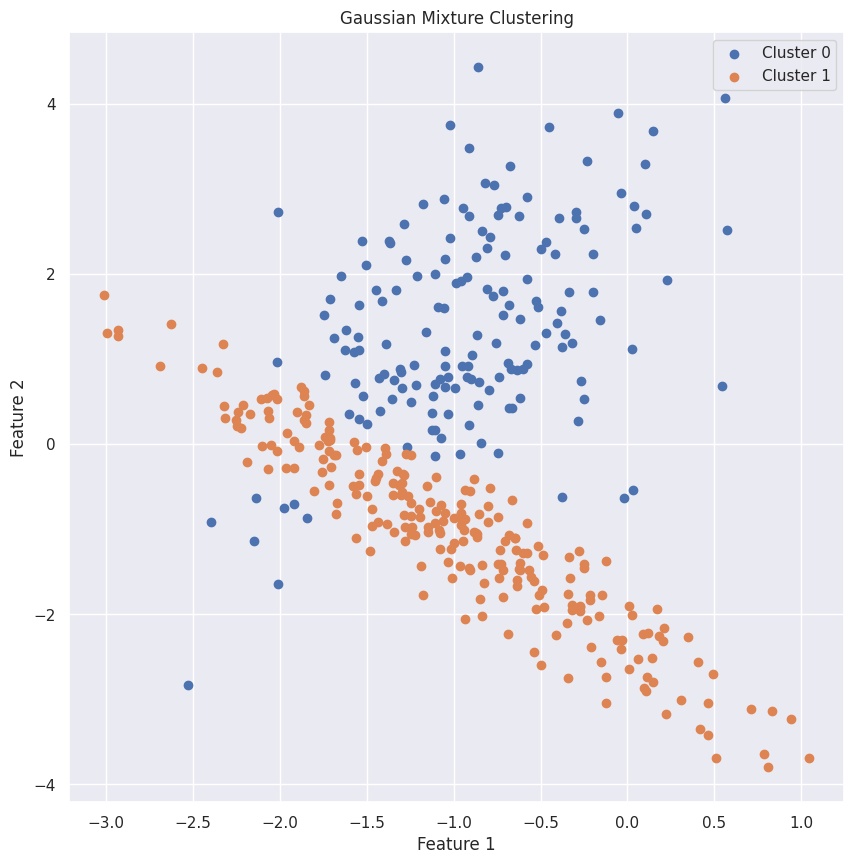

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Initialize the dataset
training_data, _ = make_classification(
    n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Define the Gaussian Mixture model
gaussian_model = GaussianMixture(n_components=2)

# Train the model
gaussian_model.fit(training_data)

# Assign each data point to a cluster
gaussian_result = gaussian_model.predict(training_data)

# Get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# Plot the Gaussian Mixture clusters
for gaussian_cluster in gaussian_clusters:
    # Get data points that belong to this cluster
    indices = np.where(gaussian_result == gaussian_cluster)
    # Make the scatter plot for the first two features
    plt.scatter(training_data[indices, 0], training_data[indices, 1], label=f'Cluster {gaussian_cluster}')

# Show the Gaussian Mixture plot with legend
plt.title("Gaussian Mixture Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

BIRCH

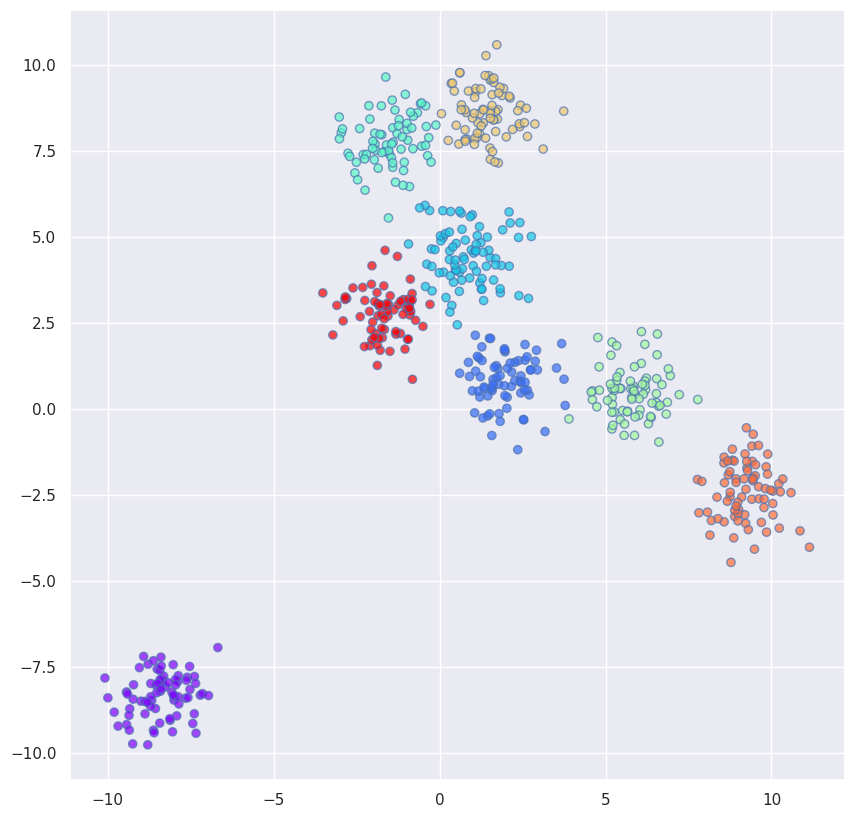

In [11]:

# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
 
# Generating 600 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)
 
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
 
# Fit the data (Training)
model.fit(dataset)
 
# Predict the same data
pred = model.predict(dataset)
 
# Creating a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()